In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/content/Bank_Marketing.csv")

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data.shape

(41188, 21)

In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
#to find unique values
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [11]:
#none feature with only one value

In [12]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
categorical_features=[feature for feature in data.columns if ((data[feature].dtype=='O')& (feature not in ['y']))]
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [14]:
#there are total 10 categorical features

In [15]:
categorical_data = data.select_dtypes(exclude=np.number)      # we will exclude data with numeric features
categorical_col = categorical_data.columns                    # we will store the categorical features in a variable


print("Categorical Features:")
print(categorical_data.head())

Categorical Features:
         job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no  


In [16]:
categorical_data.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [17]:
#feature job has highest number of caterogical features i.e 12
#months has second highest number of categorical features i.e 10

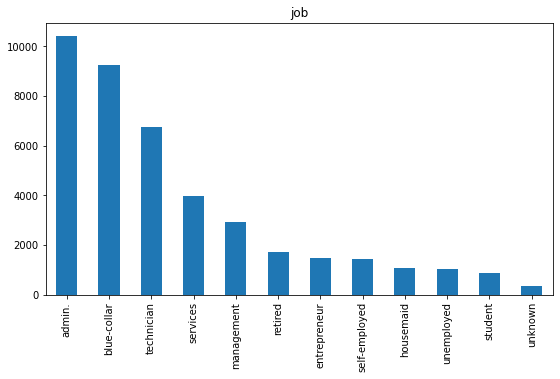

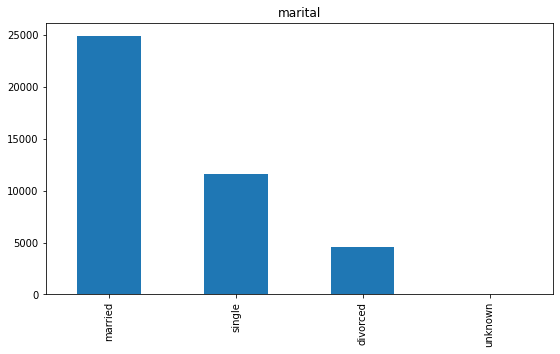

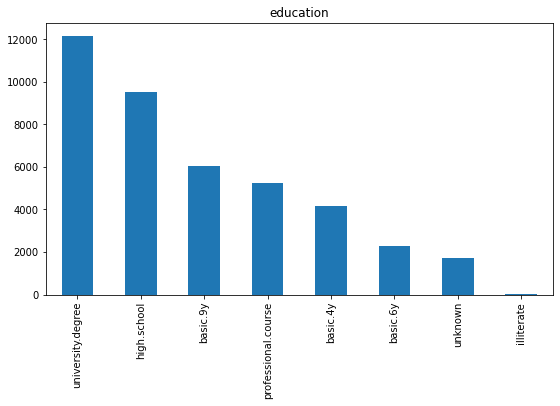

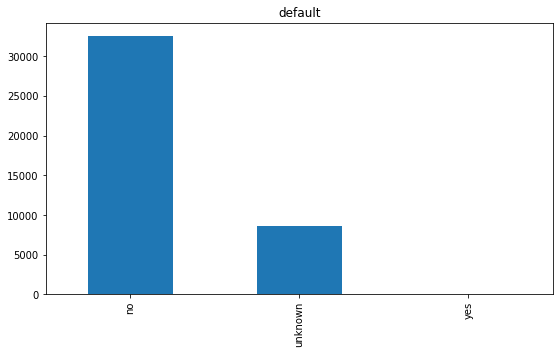

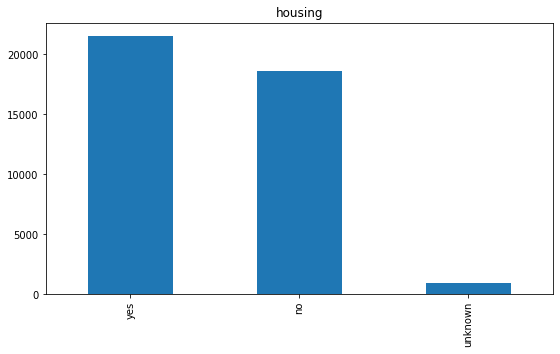

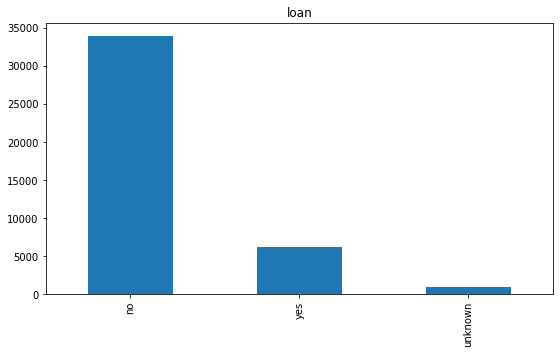

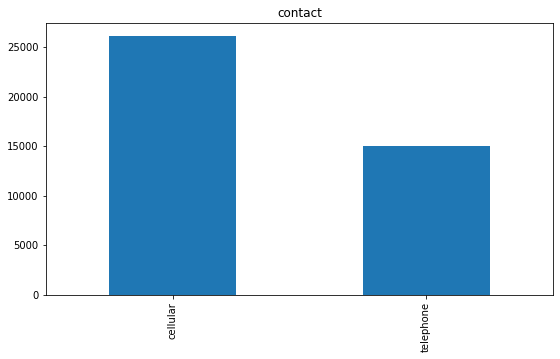

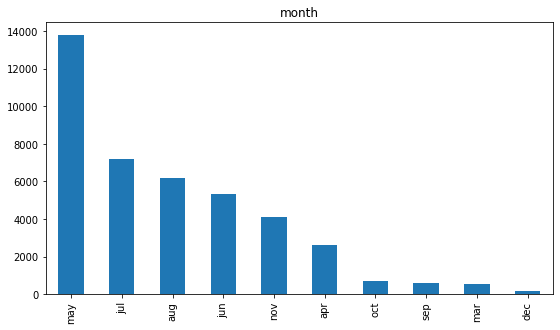

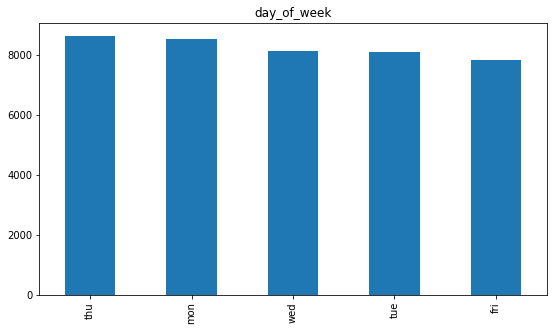

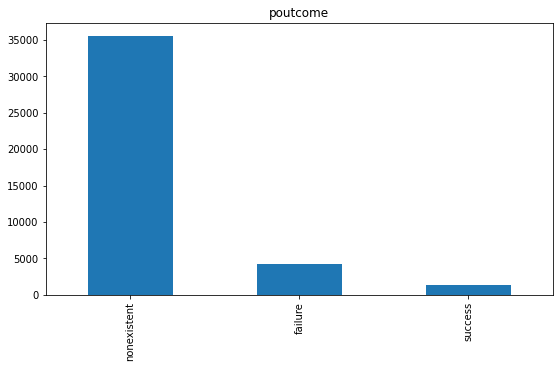

In [18]:
#categorical feature distribution
#count based on categorical features
for column in categorical_features:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

In [19]:
#client with job as admin records high in given dataset and students have very less.
#clients who are married has high records in dataset and divorced are very less.
#clients with university degree are in high numbers and basic 6y education are the least.
#default parameter does not seems to play an important role.
#data in the month of may is high and in december is low.

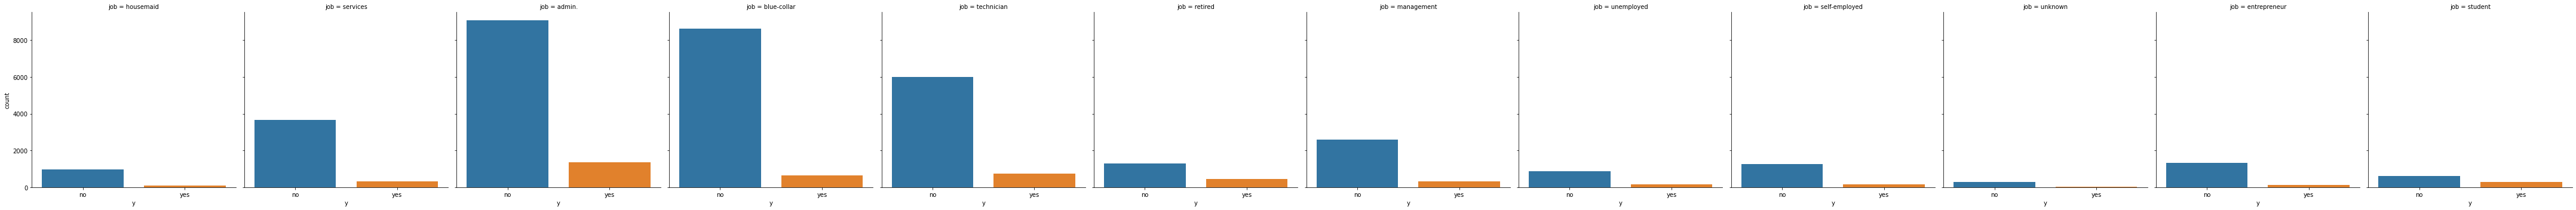

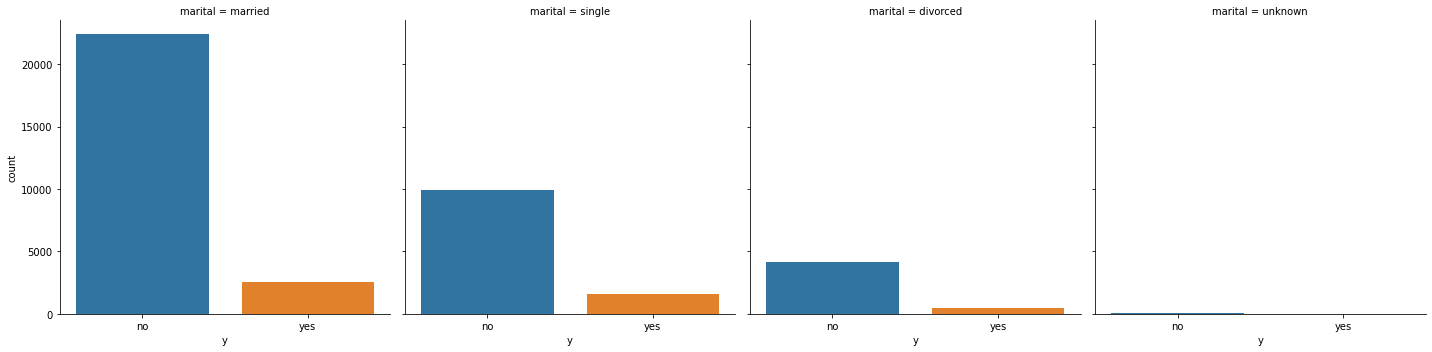

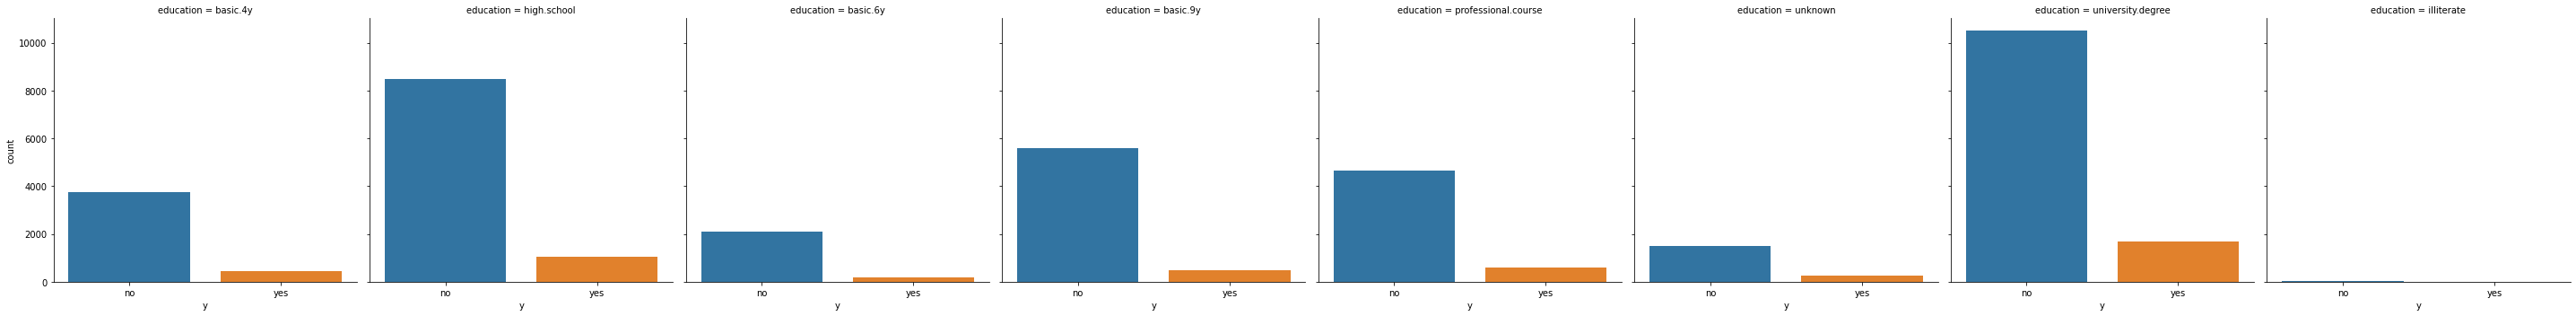

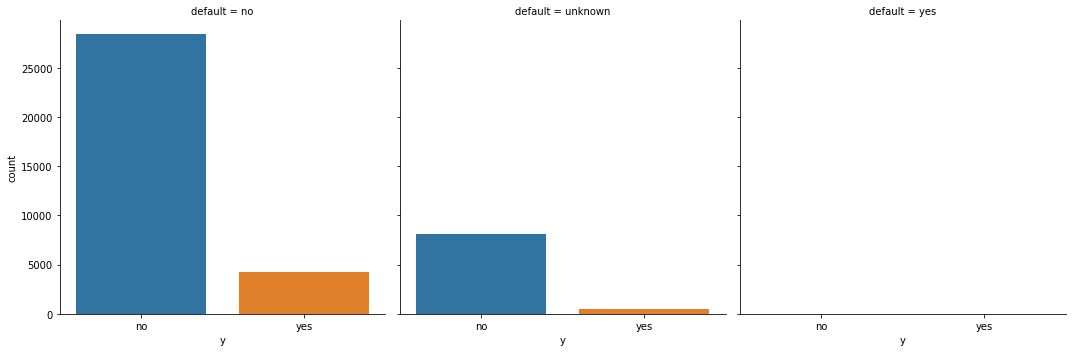

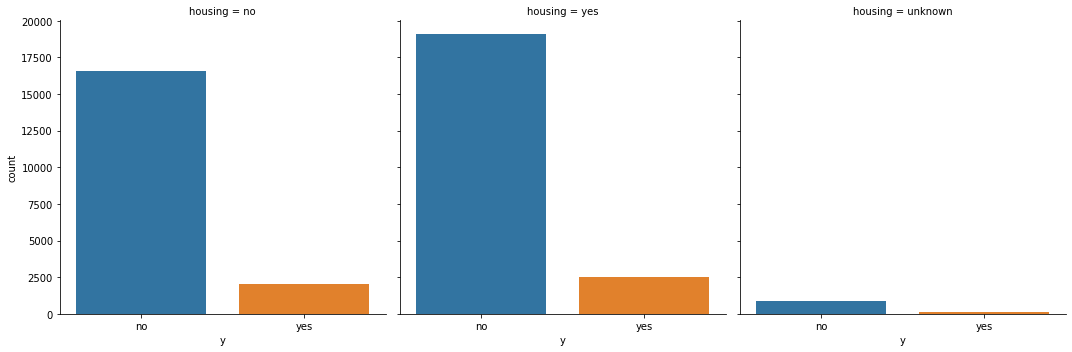

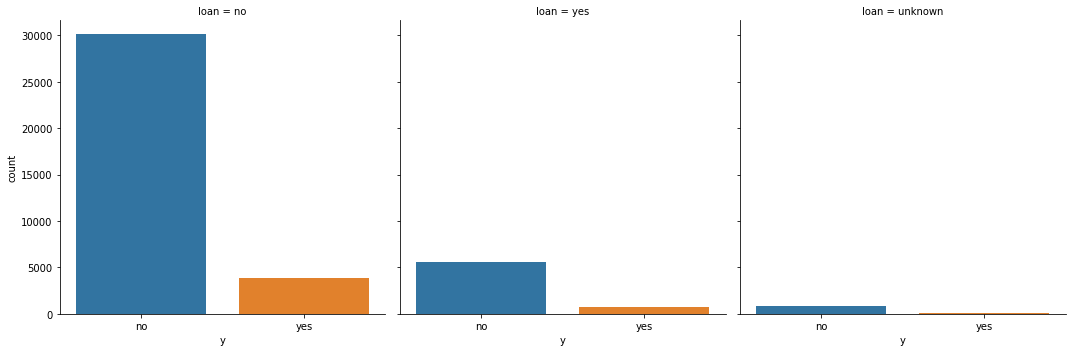

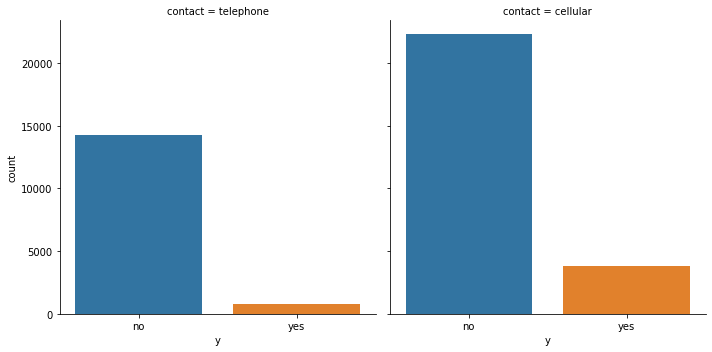

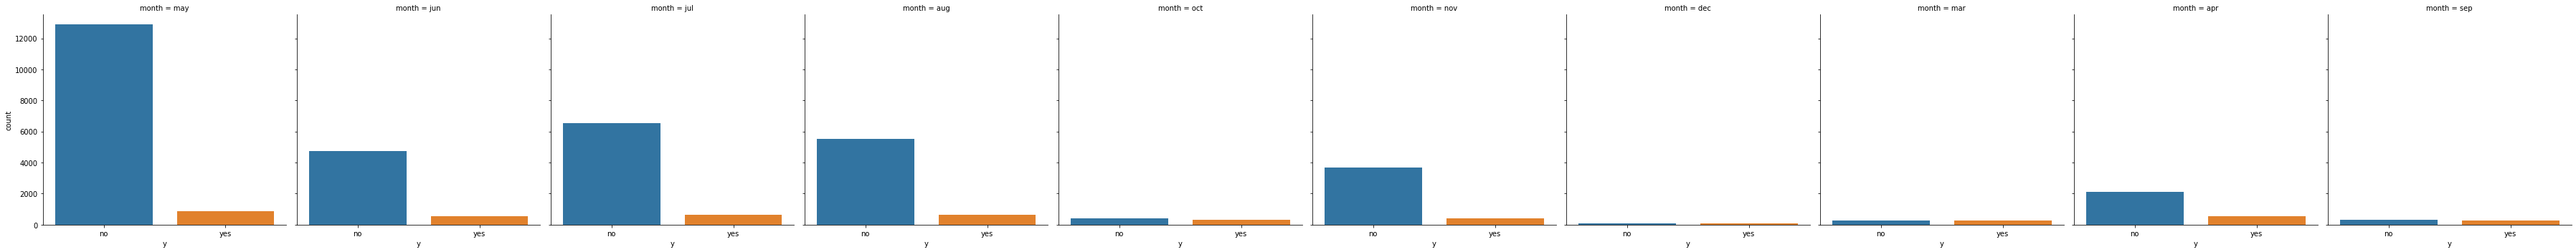

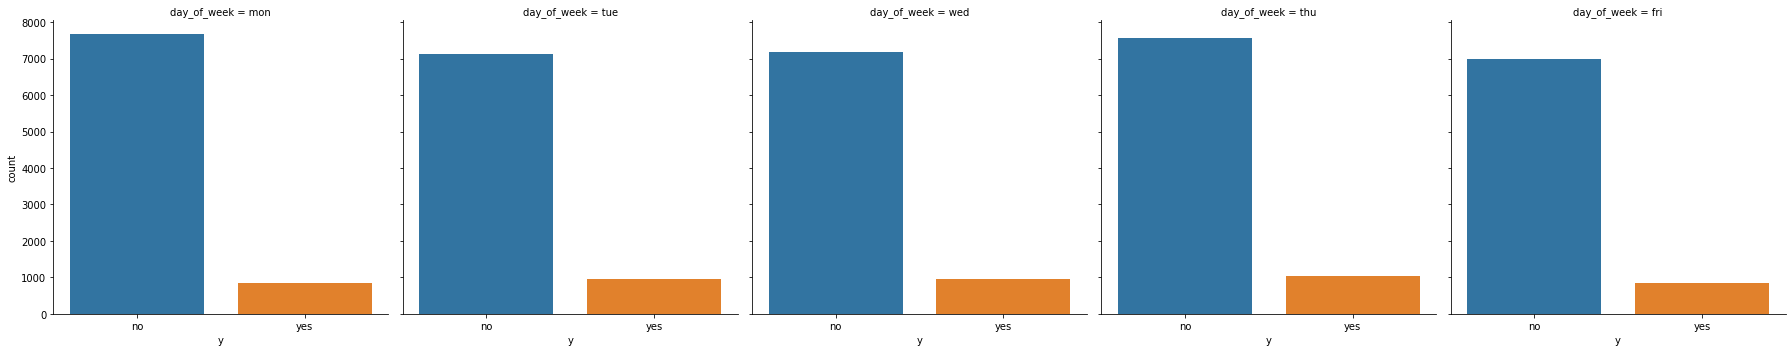

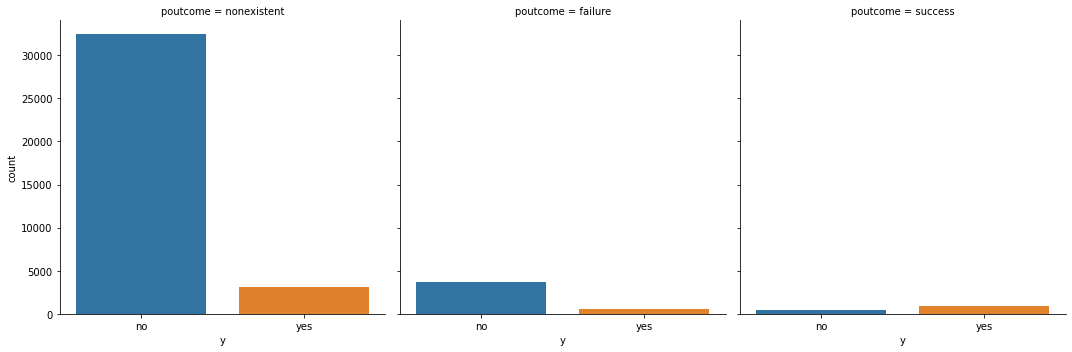

In [20]:
#find out the relationship between categorical features and dependent variable to get a graph against term deposit to 
#detect features agains clients who have said yes.

for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count',data=data)
plt.show()
    

In [21]:
for categorical_feature in categorical_features:
    print(data.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

In [22]:
#client in the month of may have highest intrest to the term deposit and clients in december has the lowest.
#clients on thursday has highest number of intrest to the deposit.
#clients who were contaced on cellphone are more tends towards term deposit.

In [23]:
numerical_features=[feature for feature in data.columns if ((data[feature].dtype !='O')& (feature not in ['y']))]
print(numerical_features)


['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [24]:
data[numerical_features].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [25]:
#discrete features
discrete_features=[feature for feature in numerical_features if len(data[feature].unique())<25]
print(discrete_features)

['previous', 'emp.var.rate', 'nr.employed']


In [26]:
#continues features
continues_features=[feature for feature in numerical_features if feature not in discrete_features+['deposit']]
print(continues_features)

['age', 'duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


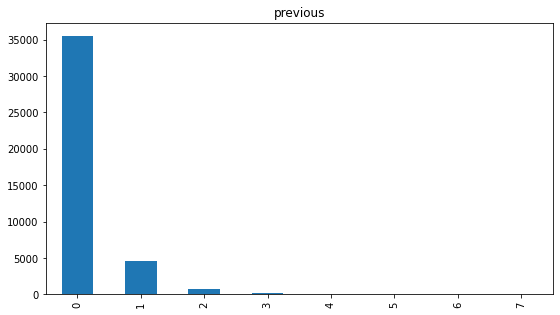

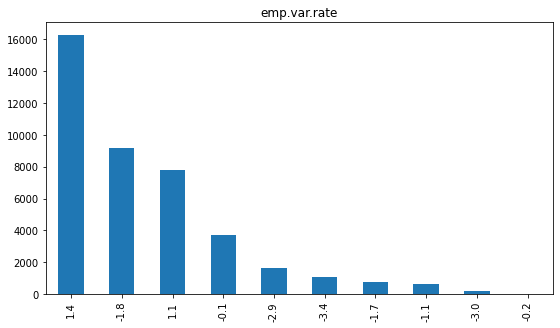

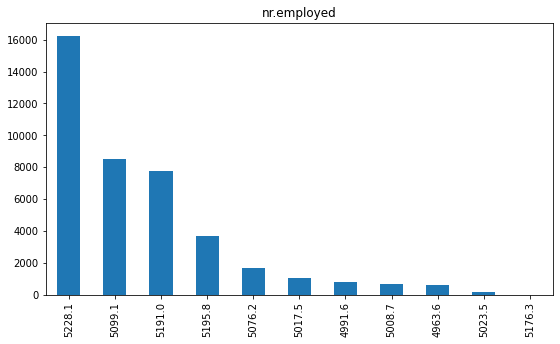

In [27]:
#distribution of discrete feature
for column in discrete_features:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

In [28]:
#almost 35000 clients were not approached on previous capmaign.

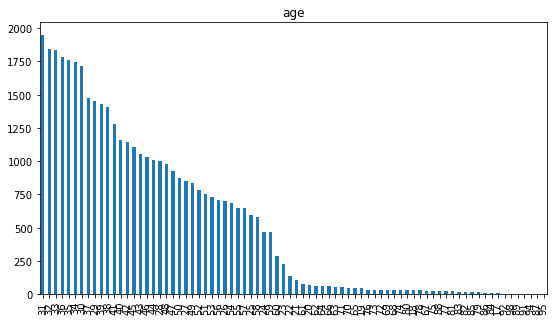

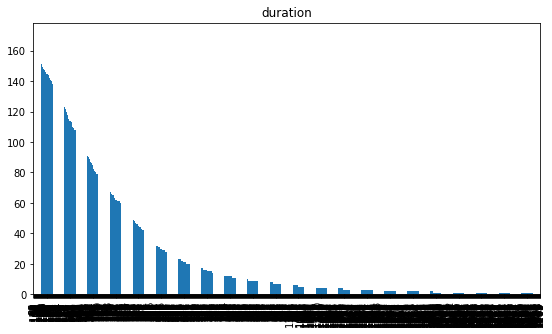

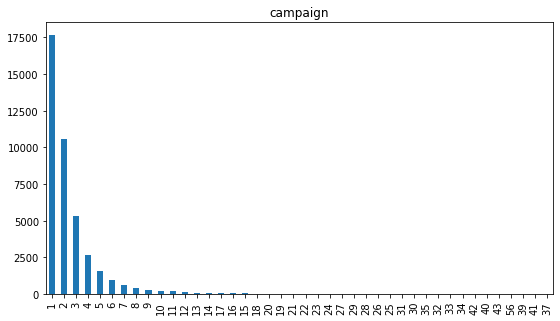

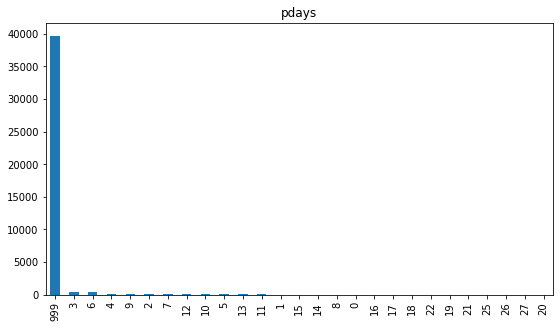

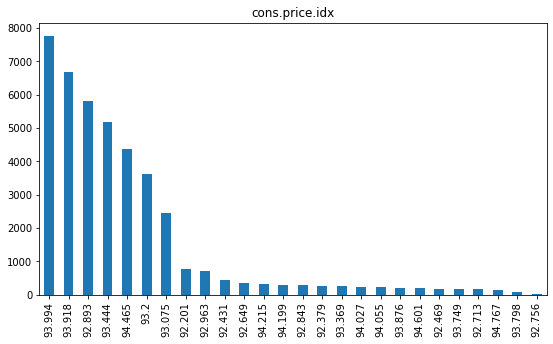

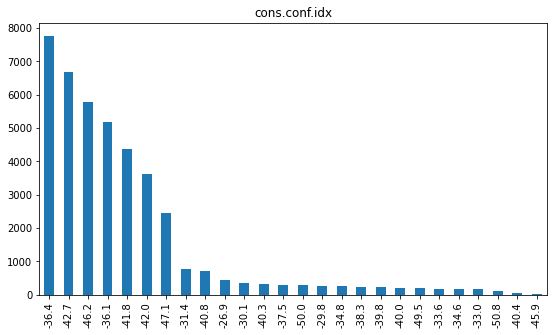

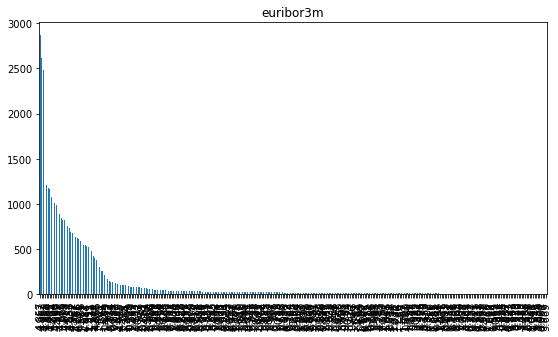

In [29]:
#distribution of continues featur
for column in continues_features:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

In [30]:
#almost 17000 clients are contacted once during this campaign and slightly more than 10000 are contacted twice.
#almost 40000 clients were not contacted after previous campaign.

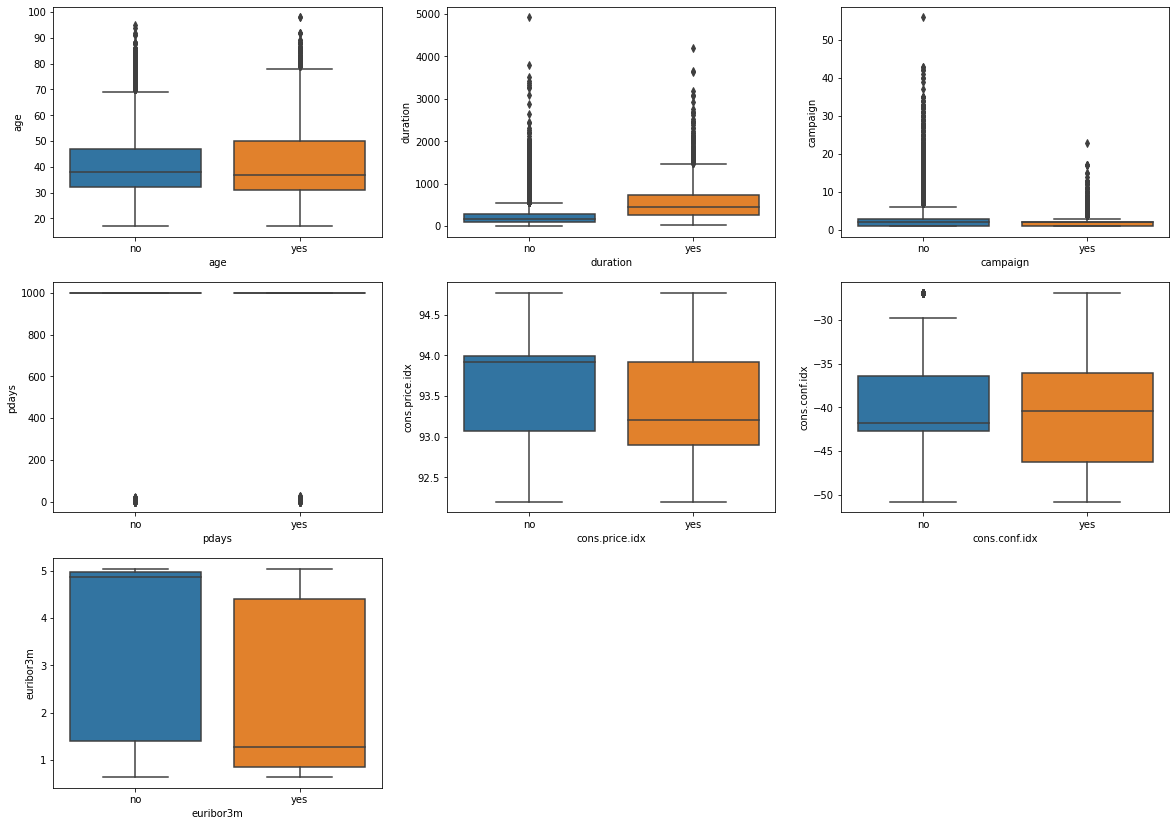

In [31]:
#relationship between continuous numerical feature and labels
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continues_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y=data[feature], data=data)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [32]:
#duration,age and campaign have most outliers.
#people around age 35(median value) are more intrested in term deposit.
#client who talks for very few seconds are not intrseted in term deposit.
#clients who has talked more than 10 minutes are more who have taken the term deposit.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

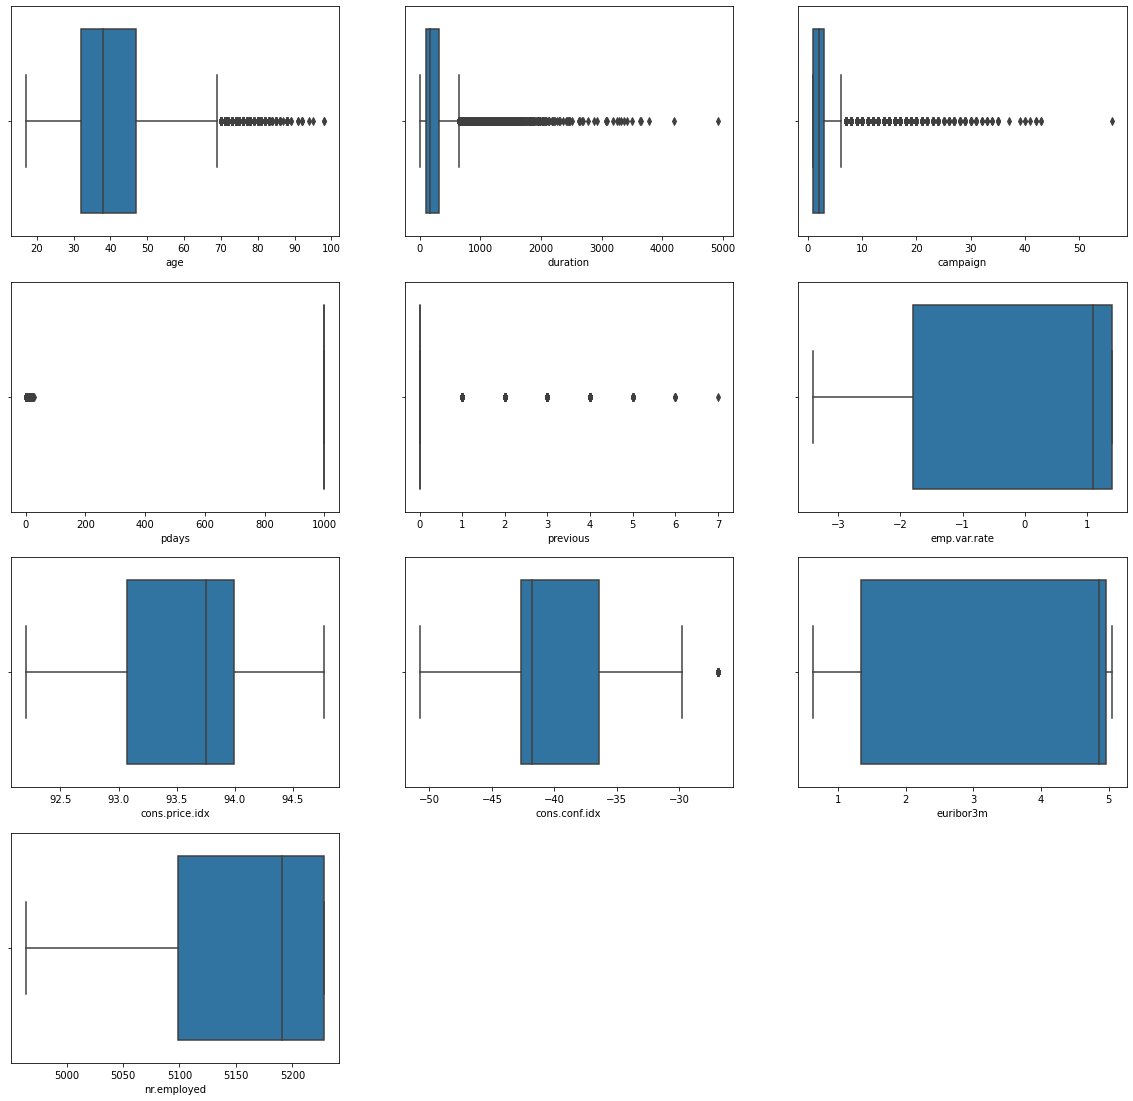

In [33]:
#for outliers in numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

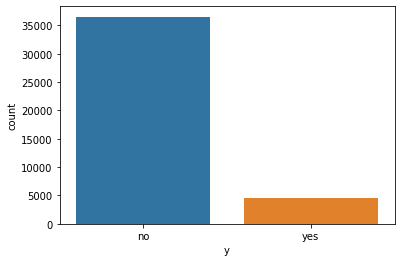

In [34]:
#check the data set is balanced or not based on target values in classification
sns.countplot(x='y',data=data)
plt.show()

In [35]:
#88% of clients has not signed the term deposit.
data['y'].groupby(data['y']).count()

y
no     36548
yes     4640
Name: y, dtype: int64

In [36]:
#conclusion:
#Clients having housing loan are more intrested in term deposit.
#Client whose call duration more than 10 mins are more tends towards term deposit.
#83% of clients were not contacted from previous campaign.

In [ ]:
#feature engineering

In [41]:
df2= data.copy()

In [42]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
df2.shape

(41188, 21)

In [44]:
#defaut features does not play imp role
df2.groupby(['y','default']).size()
# 79% of default has no value.

y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
dtype: int64

In [45]:
df2.drop(['default'],axis=1, inplace=True)

In [47]:
df2.groupby(['y','pdays']).size()

y    pdays
no   0            5
     1           18
     2           24
     3          141
     4           55
     5           17
     6          123
     7           20
     8            6
     9           29
     10          22
     11          13
     12          32
     13           8
     14           9
     15           8
     16           5
     17           6
     18           3
     19           2
     20           1
     22           1
     999      36000
yes  0           10
     1            8
     2           37
     3          298
     4           63
     5           29
     6          289
     7           40
     8           12
     9           35
     10          30
     11          15
     12          26
     13          28
     14          11
     15          16
     16           6
     17           2
     18           4
     19           1
     21           2
     22           2
     25           1
     26           1
     27           1
     999       3673
dtype: in

In [48]:
#drop pdays as it has 999 (Client was not contacted previously) value for around 90% + 
df2.drop(['pdays'],axis=1, inplace=True)

In [49]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()

age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: age, Length: 78, dtype: int64

In [50]:
df3 = df2[df2['age'] < 93]

In [52]:
#remove outliers in feature duration...
df3.groupby(['y','duration'],sort=True)['duration'].count()
#these outlier should not be remove as duration goes high, client show interest on deposit

y    duration
no   0            4
     1            3
     2            1
     3            3
     4           12
                 ..
yes  3094         1
     3183         1
     3631         1
     3643         1
     4199         1
Name: duration, Length: 2562, dtype: int64

In [54]:
#remove outliers in feature campaign...
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           15341
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
     33              4
     34              3
     35              5
     37              1
     39              1
     40              2
     41              1
     42              2
     43              2
     56              1
yes  1            22

In [142]:
df12= df3[df3['campaign'] < 36]

In [143]:
df12.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           15341
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
     33              4
     34              3
     35              5
yes  1            2299
     2            1210
     3             574
     4             249
     5             120
     6              75
     7              38
     8              

In [144]:
#remove outliers in feature previous...
df12.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           32411
     1            3594
     2             404
     3              88
     4              32
     5               5
     6               2
     7               1
yes  0            3140
     1             967
     2             349
     3             128
     4              38
     5              13
     6               3
Name: previous, dtype: int64

In [145]:
df13 = df12[df12['previous'] < 5]

In [146]:
df13.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [147]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome','day_of_week']
for col in  cat_columns:
    df13 = pd.concat([df13.drop(col, axis=1),pd.get_dummies(df13[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [149]:
bool_columns = ['housing', 'loan', 'y']
for col in  bool_columns:
    df13[col+'_new']=df13[col].apply(lambda x : 1 if x == 'yes' else 0)
    df13.drop(col, axis=1, inplace=True)

In [150]:
df13.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,housing_new,loan_new,y_new
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,1,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,1,0


In [151]:
# Select Features
feature = df13.drop('y_new', axis=1)

# Select Target
target = df13['y_new']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)


In [152]:
len(x_train)

32920

In [153]:
len(x_test)

8231

In [154]:
len(y_train)

32920

In [155]:
len(y_test)

8231

In [156]:
# function to evaluate and calculate accuracy, precision, recall, F1-score and kappa score
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Visualization of Confusion matrix
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [157]:
# Decision Tree Model

from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

Accuracy: 0.8909002551330336
Precision: 0.5021551724137931
Recall: 0.516629711751663
F1 Score: 0.5092896174863388
Cohens Kappa Score: 0.4479312203843593
Area Under Curve: 0.7267962312339977
Confusion Matrix:
 [[6867  462]
 [ 436  466]]


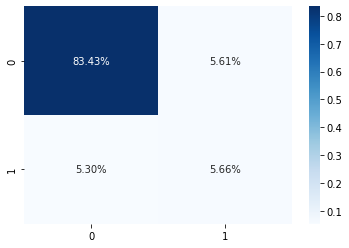

In [159]:
# Evaluate Decision Tree Model
dtc_eval = evaluate_model(dtc, x_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

In [161]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Accuracy: 0.9131332766371036
Precision: 0.6808510638297872
Recall: 0.3902439024390244
F1 Score: 0.49612403100775193
Cohens Kappa Score: 0.45239613474157403
Area Under Curve: 0.9215726850082849
Confusion Matrix:
 [[7164  165]
 [ 550  352]]


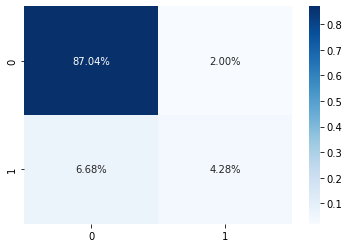

In [163]:
# Evaluate Logistic Regression Model
lr_eval = evaluate_model(logreg, x_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

In [164]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

Accuracy: 0.919207872676467
Precision: 0.6771300448430493
Recall: 0.5022172949002217
F1 Score: 0.5767027371101209
Cohens Kappa Score: 0.5331283411626979
Area Under Curve: 0.9384940425893673
Confusion Matrix:
 [[7113  216]
 [ 449  453]]


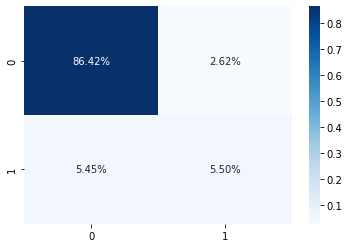

In [166]:
# Evaluate Random Forest Model
rf_eval = evaluate_model(rf, x_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

In [168]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

Accuracy: 0.8766857004009233
Precision: 0.44228804902962204
Recall: 0.48004434589800443
F1 Score: 0.46039340776182874
Cohens Kappa Score: 0.390913939121759
Area Under Curve: 0.850311870439063
Confusion Matrix:
 [[6783  546]
 [ 469  433]]


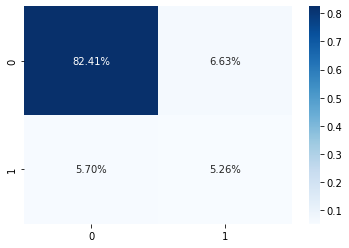

In [169]:
# Evaluate Naive Bayes Model
nb_eval = evaluate_model(nb, x_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

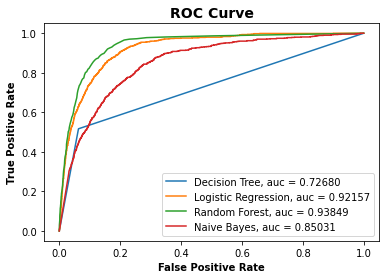

In [172]:
## Comparing ROC Curve
fig, (ax1) = plt.subplots(1)

ax1.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax1.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax1.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax1.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))

## Configure x and y axis
ax1.set_xlabel('False Positive Rate', fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax1.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax1.legend(loc=4)

plt.show()